In [1]:
import sys
sys.path.append("../pre-processing")
sys.path.append("../pre-processing/methods")
sys.path.append("../LearningModel")
from parse import parse
from freqDomain import *
from prepare_data import prepare_data
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
from scipy import interpolate
from freq_domain_mlp import *

Using TensorFlow backend.


# Load Data

In [2]:
new_x = prepare_data("/Users/williamlevine/Downloads/OpenBCI-RAW-2017-07-01_13-44-37.txt", return_multi_feat = True, num_channels = 1, window = 225)[0]

../pre-processing/methods/freqDomain.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  ret[j][i] = fft(data[j][(i - window): i])
/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [3]:
def normalize(data):
    data = np.array(data)
    for feat in range(data.shape[1]):
        data[:, feat] = data[:, feat] - np.mean(data[:, feat])
        data[:, feat] = data[:, feat] / np.max(data[:, feat])
    return data

In [4]:
labels = []
for i in range(10):
    for _ in range(400):
        labels.append(0)
    for _ in range(400):
        labels.append(1)
    for _ in range(400):
        labels.append(-1)
for _ in range(400):
    labels.append(0)
labels = labels[7300:]
new_x = new_x[7500:]
labels = labels[:len(new_x)]
new_x = normalize(new_x[:len(labels)])

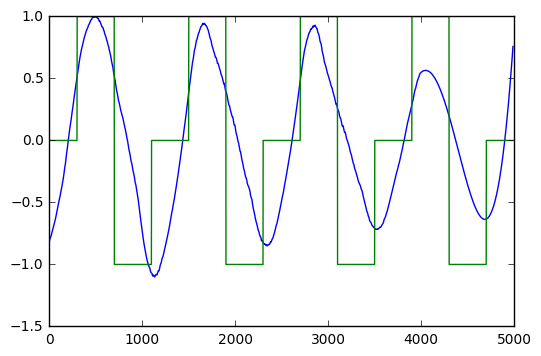

In [5]:
plt.plot(new_x[:, 1])
plt.plot(labels)
plt.show()

In [ ]:
mlp = MLP()
mlp.set_model("/Users/williamlevine/Documents/BCI/AirStar/LearningModel/saved_models/97-F1.h5")

In [ ]:
mlp.evaluate(new_x, labels, min_size = 100, display_feat = 1)

# Generate the labels

In [6]:
net = [new_x, labels]

In [8]:
len(net[1])

4988

In [9]:
pickle.dump(net, open("/Users/williamlevine/Downloads/2-Seconds-Will-Trial-2.MultFeat", 'wb'))

In [ ]:
net_x = np.concatenate((new_x, 2 * old_x, new_x))
net_labels = np.concatenate((labels, old_labels, labels))
net_data = [net_x, net_labels]

In [ ]:
plt.plot(net_x[:, 2] * 10)
plt.plot(net_labels)
plt.show()

# Only grab the not horrible parts of the data

In [ ]:
labels = labels[0:len(rawData)]
plt.plot([labels[i] * 500 for i in range(len(labels))])
plt.plot([np.max(rawData[i]) for i in range(len(rawData))])
plt.show()

In [ ]:
net_data = [rawData, labels]
print np.array(labels).shape
print np.array(rawData).shape

# Pickle Dump It

In [ ]:
import pickle
pickle.dump(net_data, open('/Users/williamlevine/Downloads/concat.MultFeat', 'wb'))

# Make Sure It Worked

In [ ]:
import pickle
new_data = pickle.load(open('/Users/williamlevine/Downloads/OpenBCI-RAW-2017-Contract-Uncontract-5-Seconds-Trial-1.DatLabl', 'r'))

In [ ]:
plt.plot(np.array(new_data[1]) * 200)
plt.plot([np.std(new_data[0][i]) for i in range(len(new_data[0]))])
plt.show()

In [ ]:
print new_data[0].shape
print np.array(new_data[1]).shape

In [ ]:
net_data = [rawData, labels]
pickle.dump(net_data, open('/Users/williamlevine/Downloads/OpenBCI-RAW-2017-Fast-Richard-Trial-1.DatLabl', 'wb'))

In [ ]:
new_data = pickle.load(open('/Users/williamlevine/Downloads/OpenBCI-RAW-2017-Fast-Richard-Trial-1.DatLabl', 'r'))

In [ ]:
new_data[0].shape

In [ ]:
plt.plot(new_data[1] * 100)
plt.plot([np.max(new_data[0][i]) for i in range(len(new_data[0]))])
plt.show()

# Concatenation

In [ ]:
import pickle
data_1 = pickle.load(open('/Users/williamlevine/Downloads/OpenBCI-RAW-Mixture-Trial-4.DatLabl', 'r'))
labels_1 = data_1[1]
x_1 = data_1[0]
data_2 = pickle.load(open('/Users/williamlevine/Downloads/OpenBCI-RAW-2017-Fast-Richard-Trial-1.DatLabl', 'r'))
labels_2 = np.array(data_2[1])[:, 0]
x_2 = data_2[0]
new_x = np.concatenate((x_1, [[0] * 36 for _ in range(200)], x_2))
new_labels = np.concatenate((labels_1, [0] * 200, labels_2))
new_net_data = [new_x, new_labels]
pickle.dump(new_net_data, open('/Users/williamlevine/Downloads/Mixture-Trial-4-And-Fast-Richard-Trial-1.DatLabl', 'wb'))

In [ ]:
new_data = pickle.load(open('/Users/williamlevine/Downloads/Mixture-Trial-4-And-Fast-Richard-Trial-1.DatLabl', 'r'))
plt.plot([np.std(new_data[0][i]) for i in range(len(new_data[0]))])
plt.plot(new_data[1] * 10000)
plt.show()